In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, Heatmap
# from random import uniform

/Users/cheehli/anaconda3/envs/jupyter/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/cheehli/anaconda3/envs/jupyter/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
df_listing = pd.read_csv('listings.csv')

## Overview of data

In [3]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


## Have a look on the columns

In [4]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
def clean_price(df):
    return df['price'].apply(lambda x: x.split('.')[0]) \
                                    .replace('[^0-9]', '', regex=True) \
                                    .apply(lambda x: int(x))
df_listing['price'] = clean_price(df_listing)

### Which neighbourhood has the most listing?

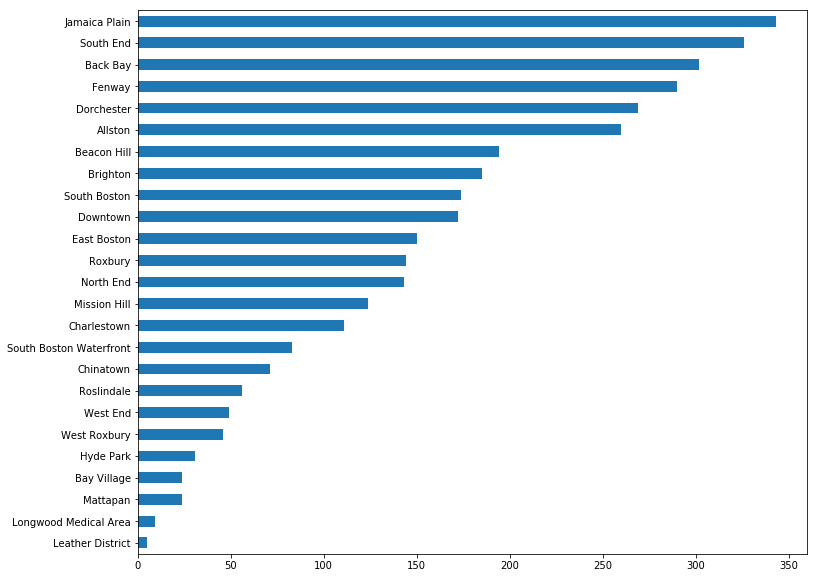

In [6]:
df_listing['neighbourhood_cleansed'].value_counts(sort=True, ascending=True).plot(kind='barh', figsize=(12,10));

In [7]:
m = Map(center=(42.31328, -71.058904), zoom=12)

m.layout.width = '100%'
m.layout.height = '700px'

heatmap = Heatmap(
    locations=[list(loc) for loc in df_listing[['latitude', 'longitude']].values],
    radius=20
)

m.add_layer(heatmap);

m

Map(center=[42.31328, -71.058904], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## Price distribution by neighbourhoods

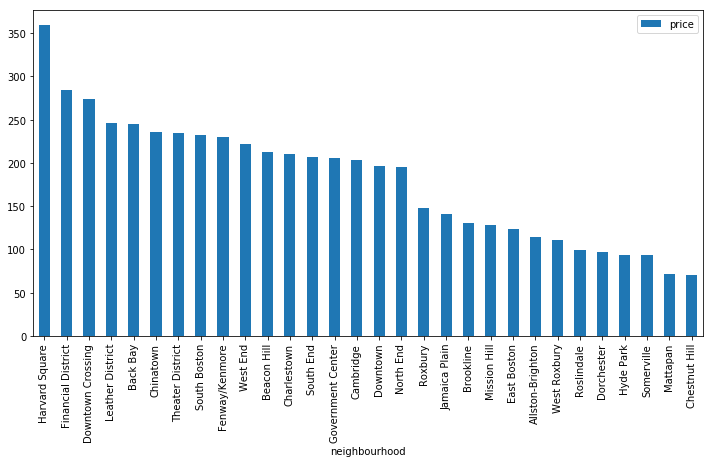

In [8]:
df_listing[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).plot(kind='bar', figsize=(12,6))

Let's see how many records in Harvard Square

In [9]:
df_listing.query('neighbourhood == "Harvard Square"')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3567,14472678,https://www.airbnb.com/rooms/14472678,20160906204935,2016-09-07,Cool 5BR in Cambridge,3 reasons why you should stay at this Flatbook...,3 reasons why you should stay at this Flatbook...,3 reasons why you should stay at this Flatbook...,none,Cambridge has a distinct vibe all its own; bot...,...,NaN,f,NaN,NaN,t,strict,f,f,58,NaN
3572,14744740,https://www.airbnb.com/rooms/14744740,20160906204935,2016-09-07,NEW - Sunny 5BR in Cambridge,This sunny Cambridge apartment boasts expansiv...,When you walk through the front door of this F...,This sunny Cambridge apartment boasts expansiv...,none,Cambridge has a distinct vibe all its own; bot...,...,NaN,f,NaN,NaN,t,strict,f,f,58,NaN


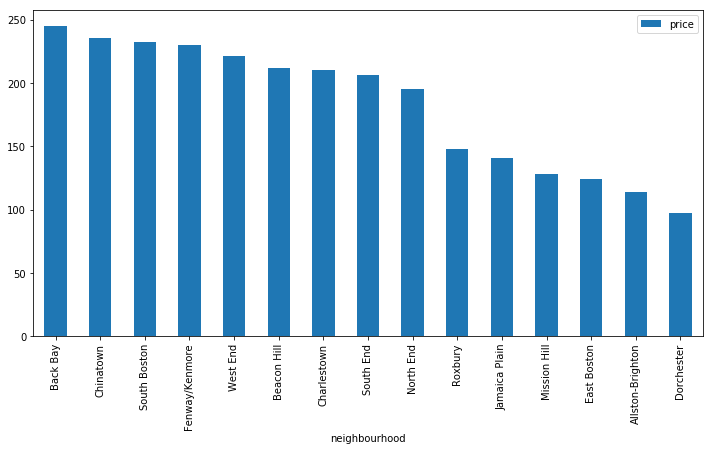

In [10]:
grouped = df_listing.groupby('neighbourhood')
neighbourhood_50 = grouped.filter(lambda x: x['neighbourhood'].count() > 50)
neighbourhood_50[['neighbourhood', 'price']] \
  .groupby('neighbourhood') \
  .mean() \
  .sort_values('price', ascending=False) \
  .plot(kind='bar', figsize=(12,6))

## What kind of room are popular?

In [11]:
df_listing[['neighbourhood', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']]

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250,NaN,NaN,NaN,$35.00
1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65,$400.00,NaN,$95.00,$10.00
2,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65,$395.00,"$1,350.00",NaN,NaN
3,NaN,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75,NaN,NaN,$100.00,$50.00
4,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,79,NaN,NaN,NaN,$15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Somerville,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,69,NaN,NaN,$95.00,NaN
3581,NaN,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,150,NaN,NaN,$100.00,$15.00
3582,NaN,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{""translation missing: en.hosting_amenity_49"",...",NaN,198,NaN,NaN,NaN,NaN
3583,Somerville,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye...",NaN,65,NaN,NaN,$100.00,NaN


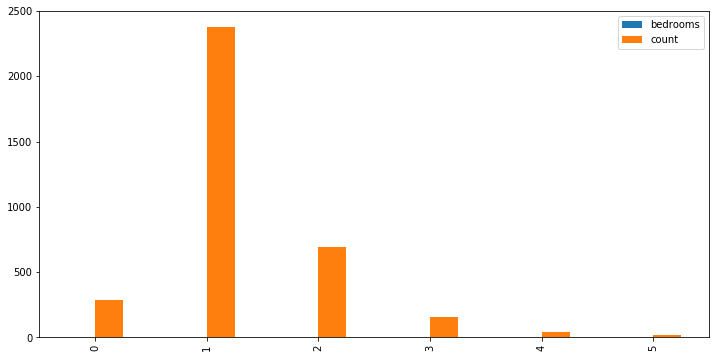

In [12]:
df_listing.groupby(['bedrooms']).size().reset_index(name='count').plot(kind='bar', figsize=(12,6));

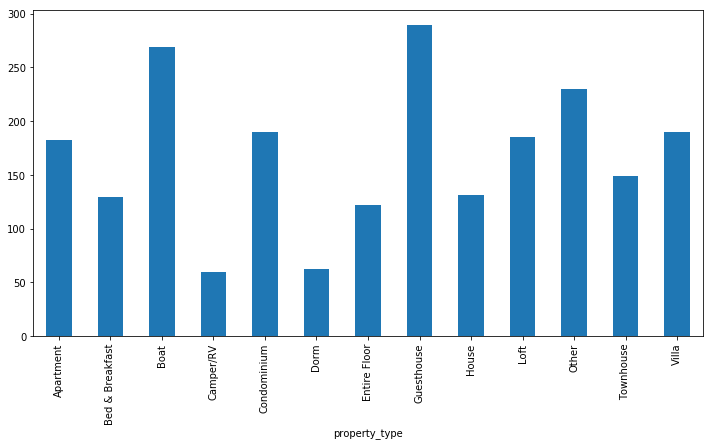

In [13]:
df_listing.groupby(['property_type'])['price'].mean().plot(kind='bar', figsize=(12,6))

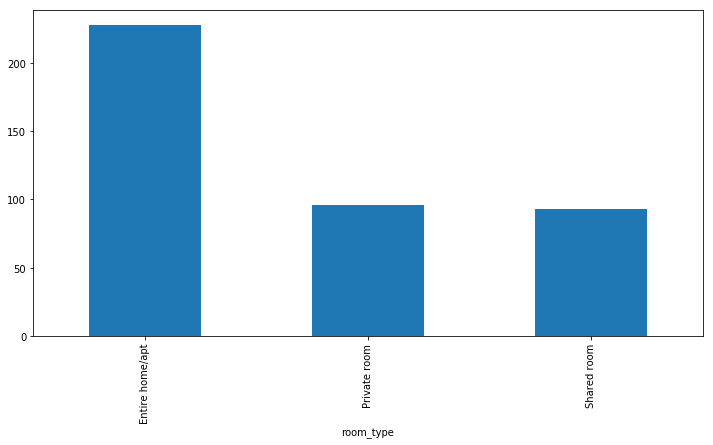

In [14]:
df_listing.groupby(['room_type'])['price'].mean().plot(kind='bar', figsize=(12,6))

In [15]:
df_listing['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

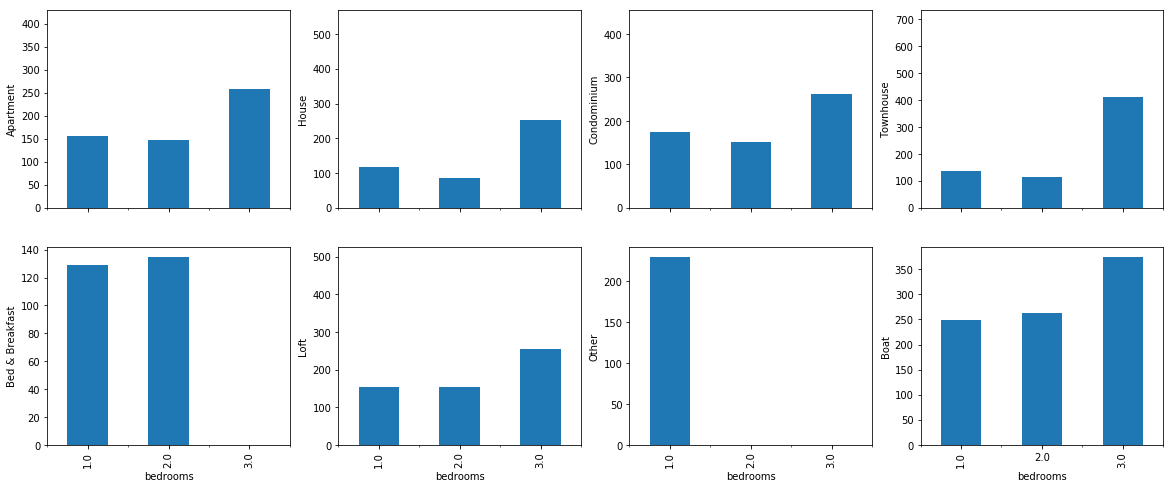

In [16]:
fig, axs = plt.subplots(2, 4, figsize=(20,8), sharex=True)

plot_pos = [
    ('Apartment', [0, 0]), 
    ('House', [0, 1]), 
    ('Condominium', [0, 2]), 
    ('Townhouse', [0, 3]), 
    ('Bed & Breakfast', [1, 0]), 
    ('Loft', [1, 1]), 
    ('Other', [1, 2]), 
    ('Boat', [1, 3])
]

for typ, pos in plot_pos:
    ax = axs[pos[0], pos[1]]
    ax.set_ylabel(typ)

    df_listing.query('property_type == "' + typ + '"') \
      .groupby('bedrooms')['price'] \
      .mean() \
      .plot(kind='bar', ax=ax)